# ¿Cómo se comportan las ventas de videojuegos?

La tienda online Ice vende videojuegos globalmente, y desea analizar como se comportan las ventas de los títulos de los juegos en relación a parámetros que tiene identificados. Para esto, tenemos un dataset histórico hasta el año 2016 que incluye los datos generales del título, ventas por regiones del mundo, el año de lanzamiento y las reseñas de usuarios. 

Queremos verificar si existe alguna relación/tendencia notable entre estos parámetros que nos permita identificar que hace a un título exitoso en ventas para planear proyectos a futuro y planificar campañas encaminadas a mejorar nuestros ingresos. Al igual, crearemos un perfil de usuario para cada mercado objetivo (ver si es lo mismo el patrón de consumo en cada región) y  conduciremos pruebas de hipótesis para ver que sucede con las reseñas de los usuarios por consola.


###### Tabla de contenidos

1. [Trabajo previo](#1)<br>
    1.1 [Importar librerías](#1.1)  
    1.2 [Trabajar con los datos](#1.2)      
2. [Análisis de datos](#2)<br>
    2.1 [Lanzamientos por año](#2.1)<br>
    2.2 [Ventas por plataforma](#2.2)<br>
    2.3 [Modelo de ventas: ventas del 2012 en adelante](#2.3)<br>
    2.4 [Relación ventas-reseñas](#2.4)<br>
    2.5 [Ventas del mismo título en distintas plataformas](#2.5)<br>
    2.6 [Ventas por género](#2.6)

3. [Perfil de usuario por región](#3)<br>
    3.1 [Cuota de mercado por consola](#3.1)<br>
    3.2 [Géneros principales por región](#3.2)<br>
    3.3 [Clasificaciones ESRB por región](#3.3)<br>
    3.4 [Pruebas de hipótesis](#3.4)<br>

4. [Conclusiones](#4)

## Trabajo previo
<a class="anchor" id="1"></a>

### Importar librerías
<a class="anchor" id="1.1"></a>

Importaremos pandas para leer los datos, numpy para trabajar con algunas fórmulas, stats para cálculos estadísticos, re para hacer regex, pyplot para hacer gráficas con mejor control y seaborn para hacer un heatmap.

In [231]:
import pandas as pd
import numpy as np
import scipy.stats as st
import re

import matplotlib.pyplot as plt
import seaborn as sns

### Trabajar con los datos
<a class="anchor" id="1.2"></a>

#### Cargar datos
<a class="anchor" id="1.2.1"></a>

Carguemos los datos que tenemos, echemosle un ojo con un sample y mostremos tanto info como describe para ver como se organizan los valores en la tabla.

In [232]:
# Cargamos df original

df_og = pd.read_csv("/datasets/games.csv")

In [233]:
# Hagamos un vistazo de lo que tenemos
display(
    df_og.sample(n=10, random_state=1)
)

df_og.info()

df_og.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14230,Rakushou! Pachi-Slot Sengen 5: Rio Paradise,PS2,2007.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14043,Nobunaga's Ambition II,3DS,2015.0,Strategy,0.00,0.00,0.04,0.00,NaN,NaN,NaN
3158,Up,DS,2009.0,Action,0.30,0.27,0.00,0.07,NaN,tbd,E
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
110,Mario Kart 8,WiiU,2014.0,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E
1988,ATV: Quad Power Racing,PS,2000.0,Racing,0.58,0.39,0.00,0.07,42.0,tbd,E
7130,64 de Hakken! Tamagotchi Minna de Tamagotchi W...,N64,1997.0,Misc,0.00,0.00,0.22,0.00,NaN,NaN,NaN
8849,Derby Stallion 64,N64,2001.0,Sports,0.00,0.00,0.15,0.00,NaN,NaN,NaN
14602,Star Wars: The Force Unleashed II,PC,2010.0,Action,0.03,0.00,0.00,0.00,59.0,5.8,T
106,Tekken 3,PS,1998.0,Fighting,3.27,2.22,1.40,0.29,96.0,9.1,T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Se ve que tenemos bastantes nulos que tenemos que ir trabajando, que las columnas tienen nombres con mayúsculas y que los tipos no están bien asignados. Empecemos con los nombres de columnas.

#### Cambiar columnas

<a class="anchor" id="1.2.2"></a>

In [234]:
# Cambiando nombres de columnas
df_clean = df_og.copy()

df_clean.columns = [
    "name", "platform", "year", "genre", "sales_na", "sales_eu",
    "sales_jp", "sales_other", "score_critic", "score_user", "rating"
]

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   year          16446 non-null  float64
 3   genre         16713 non-null  object 
 4   sales_na      16715 non-null  float64
 5   sales_eu      16715 non-null  float64
 6   sales_jp      16715 non-null  float64
 7   sales_other   16715 non-null  float64
 8   score_critic  8137 non-null   float64
 9   score_user    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Ya tenemos las columnas bien nombradas, tenemos que cambiar los tipos para poder usarlas: parece que `score_user` es la única que nos dará problemas porque debería de ser float pero tiene muchos valores con _tbd_. No podemos convertirlos a float64 porque es un string, así que convertiremos los _tbd_ a _NaN_ y cambiaremos el tipo de la columna.

In [235]:
# Hagamos los cambios
df_clean.score_user = df_clean.score_user.replace("tbd", np.NaN)

df_clean.score_user = df_clean.score_user.astype("float64")

df_clean.score_user.value_counts()

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
0.9      2
1.9      2
1.3      2
9.7      1
0.0      1
Name: score_user, Length: 95, dtype: int64

Se ve mejor, aunque los NaN nos causan ruido. Los iremos cambiando posteriormente.

#### Verificar duplicados
<a class="anchor" id="1.2.3"></a>

Revisemos si existen entradas duplicadas por nombre y plataforma (es posible tener el mismo nombre en varias plataformas si el juego es multiconsola o un remake/reboot/relaunch).

In [236]:
df_clean[df_clean.duplicated(["name", "platform"], keep=False)]

,name,platform,year,genre,sales_na,sales_eu,sales_jp,sales_other,score_critic,score_user,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Interesante, tenemos valores duplicados pero se debe a que son lanzamientos diferentes, **excepto** el último que parece ser un error. Nótese que podemos ignorar el id 16230 y quedarnos con 604 únicamente.

In [237]:
# Tiremos el valor que no queremos
df_clean = df_clean.drop(16230)

Ya estamos en condiciones de continuar.

#### Agregar columnas de ventas totales
<a class="anchor" id="1.2.4"></a>

Aunque lo usual es enriquecer los datos después de limpiar los nulos, usaremos las ventas totales posteriormente cuando hagamos imputación así que crearemos una columna `sales_total` ahora para ayudarnos. Esta tendrá la suma de todas las ventas de la fila.

In [238]:
# Sumemos las columnas de ventas
column_names = ['sales_na', 'sales_eu', 'sales_jp', 'sales_other']

df_clean["sales_total"] = df_clean[column_names].sum(axis=1)

# Echemos un vistazo

df_clean.describe()

,year,sales_na,sales_eu,sales_jp,sales_other,score_critic,score_user,sales_total
count,16445.000000,16714.000000,16714.000000,16714.000000,16714.000000,8136.000000,7589.000000,16714.000000
mean,2006.484281,0.263393,0.145068,0.077622,0.047345,68.965954,7.125260,0.533427
std,5.877071,0.813625,0.503352,0.308862,0.186736,13.938153,1.499989,1.548302
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


También agregaremos una columna `sales_max_proportion` que es la proporción con las ventas máximas, esto es, será 1.0 si es el título más vendido de la consola y de ahí bajará en proporción a las ventas relativas al máximo vendedor.

In [239]:
# Agreguemos nuestra información
max_sales_pivot = df_clean.pivot_table(index="platform", values="sales_total", aggfunc="max")

df_clean["sales_max_proportion"] = df_clean.apply(
    lambda row: row["sales_total"] / max_sales_pivot.loc[row["platform"]]["sales_total"], axis=1
)

# Echemos un vistazo
df_clean.sample(n=10, random_state=1)

,name,platform,year,genre,sales_na,sales_eu,sales_jp,sales_other,score_critic,score_user,rating,sales_total,sales_max_proportion
13569,Minna ga Shuyaku no NHK Kouhaku Quiz Kassen,Wii,2009.0,Misc,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04,0.000485
14042,Harry Potter and the Prisoner of Azkaban,PC,2004.0,Action,0.00,0.03,0.00,0.00,67.0,7.2,E,0.03,0.003745
3158,Up,DS,2009.0,Action,0.30,0.27,0.00,0.07,NaN,NaN,E,0.64,0.021477
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN,17.28,0.429423
110,Mario Kart 8,WiiU,2014.0,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09,1.000000
1988,ATV: Quad Power Racing,PS,2000.0,Racing,0.58,0.39,0.00,0.07,42.0,NaN,E,1.04,0.094977
7130,64 de Hakken! Tamagotchi Minna de Tamagotchi W...,N64,1997.0,Misc,0.00,0.00,0.22,0.00,NaN,NaN,NaN,0.22,0.018487
15327,G1 Jockey Wii,Wii,2007.0,Sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02,0.000242
14600,Muv-Luv Alternative: Total Eclipse,PS3,2013.0,Simulation,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03,0.001425
106,Tekken 3,PS,1998.0,Fighting,3.27,2.22,1.40,0.29,96.0,9.1,T,7.18,0.655708


Todo se ve bien, esto nos permitirá imputar según el total de ventas.

#### Trabajar con nulos
<a class="anchor" id="1.2.5"></a>

Iremos yendo columna por columna con nulos (`name`,`year`, `score_critic`, `score_user`, `rating`) y revisaremos que comportamiento tienen para poder hacer los cambios necesarios.

##### Columna `name`
<a class="anchor" id="1.2.5.1"></a>

El caso de `name` es curioso porque solo faltan dos valores, veamos cuales son.

In [240]:
df_clean[df_clean.name.isnull()]

,name,platform,year,genre,sales_na,sales_eu,sales_jp,sales_other,score_critic,score_user,rating,sales_total,sales_max_proportion
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39,0.397010
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03,0.004983


No podemos hacer mucho con estos datos, mejor lo removemos.

In [241]:
# Removemos nulos
df_clean = df_clean.dropna(subset=["name"])

##### Columna `year`
<a class="anchor" id="1.2.5.2"></a>

Veamos que nulos tenemos en esta columna primero.

In [242]:
# Mostremos

df_clean_year_null = df_clean[df_clean.year.isnull()]
df_clean_year_null#.drop_duplicates("name")

,name,platform,year,genre,sales_na,sales_eu,sales_jp,sales_other,score_critic,score_user,rating,sales_total,sales_max_proportion
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24,0.251802
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50,0.168188
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06,0.037073
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00,0.144161
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53,0.323944
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+,0.01,0.001302
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01,0.001416
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01,0.001248
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,0.000475


Hay videojuegos que son lanzados en diversas consolas, veamos si tenemos entradas que aparezcan en esta lista pero si tengan el año en otra plataforma (por ejemplo, si X lanzado en PS2 tiene año 2004, pero X lanzado en Xbox no lo tiene).

In [243]:
# Mostremos los que no son nulos pero existe otro con ese mismo nombre y el año si es nulo
df_clean_duplicate_name_year_not_null = df_clean[
    df_clean.name.isin(df_clean_year_null.name.unique()) & ~df_clean.year.isnull()
]

df_clean_duplicate_name_year_not_null#.drop_duplicates("name")

,name,platform,year,genre,sales_na,sales_eu,sales_jp,sales_other,score_critic,score_user,rating,sales_total,sales_max_proportion
32,Call of Duty: Black Ops,X360,2010.0,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62,0.670027
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63,0.600000
213,Madden NFL 06,PS2,2005.0,Sports,3.98,0.26,0.01,0.66,88.0,8.0,E,4.91,0.235944
241,Madden NFL 07,PS2,2006.0,Sports,3.63,0.24,0.01,0.61,84.0,8.2,E,4.49,0.215762
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN,4.33,0.719269
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15961,Majesty 2: The Fantasy Kingdom Sim,PC,2009.0,Simulation,0.01,0.00,0.00,0.00,72.0,7.3,T,0.01,0.001248
15971,Star Trek: Legacy,PC,2006.0,Simulation,0.00,0.01,0.00,0.00,56.0,4.0,E10+,0.01,0.001248
16353,Aquaman: Battle for Atlantis,GC,2003.0,Action,0.01,0.00,0.00,0.00,27.0,3.1,T,0.01,0.001416
16442,Dinotopia: The Sunstone Odyssey,XB,2003.0,Action,0.01,0.00,0.00,0.00,44.0,NaN,T,0.01,0.001179


Parece que tenemos bastantes rows en los que podemos tomar el año de otro para diferente plataforma e imputar. Con un pequeño sample mostremos que valores servirían para imputar en cada caso.

In [244]:
# Para cada valor que tenga el año nulo, mostremos que valor sirve para imputar

df_clean_sample = df_clean_year_null.sample(n=5, random_state=2)

for index, row in df_clean_sample.iterrows():
    # mostremos el row con nulo
    print(row["name"], " - ", row["platform"], " - ", row["year"])
    
    try:
        year_match = df_clean_duplicate_name_year_not_null.query("name == @row['name']")#.iloc[0]["year"]
        print(
            f"Matches: {year_match.shape[0]} | Valores: {year_match.year.values}"
        )
        
    except:
        print("No hay valor en este caso")
        
    print("-"*30)
    
    #df_clean_duplicate_name_year_not_null

Robotech: Battlecry  -  XB  -  nan
Matches: 2 | Valores: [2002. 2002.]
------------------------------
LEGO Harry Potter: Years 5-7  -  3DS  -  nan
Matches: 1 | Valores: [2012.]
------------------------------
Get Fit with Mel B  -  X360  -  nan
Matches: 2 | Valores: [2010. 2010.]
------------------------------
Saru! Get You! Million Monkeys  -  PS2  -  nan
Matches: 0 | Valores: []
------------------------------
Port Royale 3  -  PS3  -  nan
Matches: 0 | Valores: []
------------------------------


Interesante, tenemos en ocasiones varios posibles candidatos para imputar: usualmente son el mismo, pero a veces debe haber un rezago en el lanzamiento de un juego y se tiene más de un año posible. En estos casos, tomaremos el primero para imputar.

In [245]:
# Para cada valor que tenga el año nulo, imputemos

for index, row in df_clean_year_null.iterrows():
    # mostremos el row con nulo
    
    try:
        year_match = df_clean_duplicate_name_year_not_null.query("name == @row['name']").iloc[0]["year"]
        df_clean.loc[index, "year"] = year_match
    except:
        None
    
# Mostremos cuantos nulos nos quedan
df_clean_year_null = df_clean[df_clean.year.isnull()]
df_clean_year_null

,name,platform,year,genre,sales_na,sales_eu,sales_jp,sales_other,score_critic,score_user,rating,sales_total,sales_max_proportion
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00,0.144161
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47,0.113199
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E,2.40,0.151515
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,2.09,0.025321
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T,1.62,0.076960
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+,0.01,0.001248
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E10+,0.01,0.000336
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,0.000475
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,0.000475


Ya tenemos menos entradas con el año vacío, como siguiente paso para imputar, buscaremos aquellas entradas que tienen cuatro digitos en el nombre (como los juegos de deportes), y tomaremos ese número menos uno para imputar (por ejemplo, un FIFA 2008 sería en el 2007 porque se lanza un año antes).

In [246]:
#df_clean_year_null.name.unique()
df_clean_year_null[df_clean_year_null.name.str.contains("\d{4}")]

,name,platform,year,genre,sales_na,sales_eu,sales_jp,sales_other,score_critic,score_user,rating,sales_total,sales_max_proportion
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00,0.144161
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,NaN,E,0.40,0.019222
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E,0.32,0.015377
8918,All-Star Baseball 2005,XB,NaN,Sports,0.11,0.03,0.00,0.01,75.0,8.8,E,0.15,0.017689
13195,Tour de France 2011,X360,NaN,Racing,0.00,0.04,0.00,0.01,46.0,7.6,NaN,0.05,0.002291
13929,Sega Rally 2006,PS2,NaN,Racing,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04,0.001922
16079,Football Manager 2007,X360,NaN,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,0.000458


Usaremos este método para obtener el año que imputar.

In [247]:
# Definamos nuestro subset del df que tiene el título con año

df_clean_year_null = df_clean[
    df_clean.year.isnull() & df_clean_year_null.name.str.contains("\d{4}")
]

for index, row in df_clean_year_null.iterrows():
    df_clean.loc[index, "year"] = int(re.search("\d{4}", row["name"]).group(0)) - 1
    
# Veamos que tenemos
df_clean_year_null = df_clean[df_clean.year.isnull()]
df_clean_year_null

,name,platform,year,genre,sales_na,sales_eu,sales_jp,sales_other,score_critic,score_user,rating,sales_total,sales_max_proportion
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47,0.113199
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E,2.40,0.151515
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,2.09,0.025321
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T,1.62,0.076960
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN,1.46,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+,0.01,0.001248
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E10+,0.01,0.000336
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,0.000475
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,0.000475


Hemos logrado pasar de tener 269 valores vacíos a casi la mitad. En este punto no tenemos otra manera de utilizar la información que tenemos para imputar (tal vez podríamos tomar un estadístico como la mediana, pero no lo haremos en este caso) así que optaremos por removerlos del dataframe (al igual preferimos no usar datos adicionales por lo limitado del tiempo).

In [248]:
# Removamos
df_clean = df_clean.dropna(subset=["year"])

# Mostramos que está en órden
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16573 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  16573 non-null  object 
 1   platform              16573 non-null  object 
 2   year                  16573 non-null  float64
 3   genre                 16573 non-null  object 
 4   sales_na              16573 non-null  float64
 5   sales_eu              16573 non-null  float64
 6   sales_jp              16573 non-null  float64
 7   sales_other           16573 non-null  float64
 8   score_critic          8078 non-null   float64
 9   score_user            7542 non-null   float64
 10  rating                9870 non-null   object 
 11  sales_total           16573 non-null  float64
 12  sales_max_proportion  16573 non-null  float64
dtypes: float64(9), object(4)
memory usage: 1.8+ MB


Todo se ve en órden para year, tenemos menos records pero 139 de 16712 son menos del 1% por lo que no debería haber mayor problema.

##### Columna `score_critic`
<a class="anchor" id="1.2.5.3"></a>

Pasemos ahora a los valores en la columna `score_critic`: echemos un vistazo a los nulos de esta columna.

In [249]:
# Mostremos la información
df_clean[df_clean.score_critic.isnull()].sample(n=10, random_state=2)

,name,platform,year,genre,sales_na,sales_eu,sales_jp,sales_other,score_critic,score_user,rating,sales_total,sales_max_proportion
11395,Wildlife Park 3,PC,2011.0,Simulation,0.00,0.07,0.00,0.01,NaN,NaN,NaN,0.08,0.009988
12660,Imagine: Resort Owner,DS,2010.0,Strategy,0.05,0.00,0.00,0.00,NaN,NaN,E,0.05,0.001678
8877,Winning Post 4,PS,1999.0,Sports,0.00,0.00,0.14,0.01,NaN,NaN,NaN,0.15,0.013699
1261,WWF No Mercy,N64,2000.0,Fighting,1.20,0.27,0.02,0.02,NaN,NaN,NaN,1.51,0.126891
9509,Borderlands: Double Game Add-On Pack,X360,2010.0,Shooter,0.10,0.02,0.00,0.01,NaN,NaN,M,0.13,0.005958
11730,Tales of Fandom Vol.2,PS2,2007.0,Role-Playing,0.00,0.00,0.08,0.00,NaN,NaN,NaN,0.08,0.003844
11557,Sengoku Musou 3: Moushouden,Wii,2011.0,Action,0.00,0.00,0.08,0.00,NaN,NaN,NaN,0.08,0.000969
12389,Star Fighter,PS,1995.0,Shooter,0.04,0.02,0.00,0.00,NaN,NaN,NaN,0.06,0.005479
14312,Super Hero Generation,PS3,2014.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03,0.001425
703,TOCA Touring Car Championship,PS,1997.0,Racing,0.07,2.00,0.02,0.18,NaN,NaN,NaN,2.27,0.207306


Viendo este pequeño sample nos damos cuenta de que pareciera que las tres columnas de scores y ratings suelen estar vacías juntas (o al menos que por alguna razón el estar vacía una indica la presencia de otra(s) vacía), esto puede deberse a errores de fuente. Veamos cuantas entradas se tienen con este escenario.

In [250]:
# Un poco feo, pero funciona para las tres columnas

df_clean[
    df_clean.rating.isnull() & df_clean.score_critic.isnull() & df_clean.score_user.isnull()
]

,name,platform,year,genre,sales_na,sales_eu,sales_jp,sales_other,score_critic,score_user,rating,sales_total,sales_max_proportion
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,1.000000
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,1.000000
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26,0.964308
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31,0.703529
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67,0.827852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,0.000475
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,0.000458
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,0.005102
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,0.000631


Interesante, parece que en lo general es normal tener las tres columnas como nulos: esto debe de ser debido a un error de entrada desde los datos fuentes como habíamos mencionado.

Ahora, necesitamos saber si existe alguna relación entre esta `score_critic` y las demás. En lo general, se podría decir que los videojuegos que venden más deberían de tener mejor calificación, y que las calificaciones suelen estar agrupadas alrededor del género-plataforma (hay consolas de videojuegos que son muy populares por algunos géneros específicos, y suelen tener títulos muy famosos, por ejemplo, Dreamcast era muy famosa por sus RPGs y Xbox 360 por los FPS), por lo que veremos como se distribuyen. 

Como las ventas totales no serán iguales para las consolas, no podríamos solo comparar `sales_total`, sino que compararemos con la proporción al máximo de ventas de esa consola (por ejemplo, el mayor vendedor de Wii es _Wii Sports_, por lo que todo se medirá con respecto a ese título de esa plataforma) y usaremos una matriz de correlación ya que es una variable cuantitativa. Para el caso de género-plataforma, tendremos que usar boxplots porque tenemos variables categóricas. Vamos a ello, definamos un df con solo valores no nulos y de ahí continuamos.

In [251]:
# Definamos ahora el df a usar para estos análisis
df_clean_score_rating_not_null = df_clean[
    ~df_clean.rating.isnull() & ~df_clean.score_critic.isnull() & ~df_clean.score_user.isnull()
]

# Mostremos la correlación
df_clean_score_rating_not_null[["score_critic", "score_user", "sales_max_proportion"]].corr()

,score_critic,score_user,sales_max_proportion
score_critic,1.000000,0.581291,0.327523
score_user,0.581291,1.000000,0.125178
sales_max_proportion,0.327523,0.125178,1.000000


Interesante, de la matriz anterior podemos ver que existe correlación media entre `score_critic` y `score_user` (probablemente los usarios compren juegos que lean reviews positivos), pero media-débil con las ventas: los juegos mejor vendidos no son necesariamente los mejor calificados. Para poder ver esto mejor mostremos estas columnas como una matriz de dispersión.

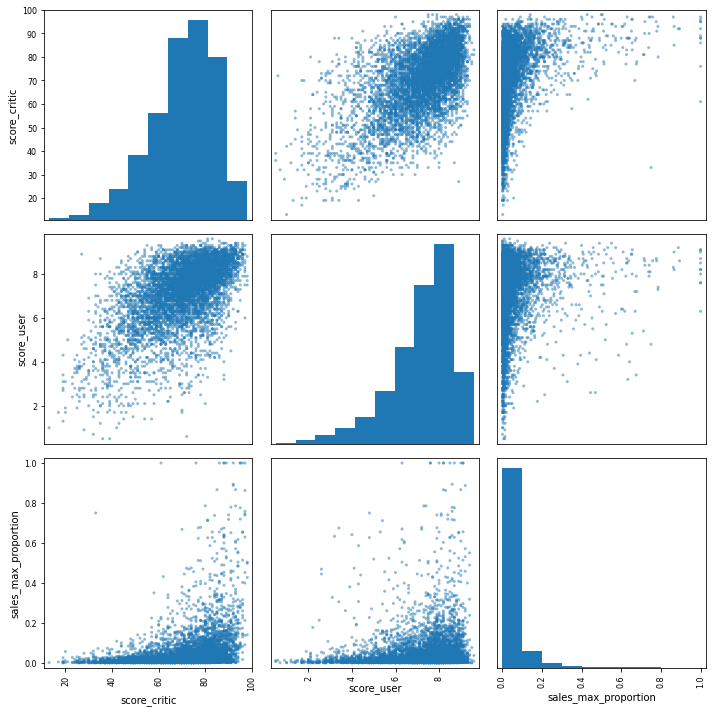

In [252]:
# Grafiquemos la dispersión para ver mejor
pd.plotting.scatter_matrix(
    df_clean_score_rating_not_null[["score_critic", "score_user", "sales_max_proportion"]],
    figsize = (10,10),
    alpha=0.5
)

plt.tight_layout()
plt.show()

Centremos nuestra atención en la gráfica _sales_max_proportion_ contra _score_critic_: es una tendencia hacia arriba, los juegos con mejores reviews de los críticos pueden vender más pero no es garantía (nótese que es más bien una envolvente que limita, pero no lleva a vender más). Es un comportamiento interesante, pero no lo usaremos para hacer imputación ya que es muy disperso: de hecho, **no pareciera que tengamos una manera clara de como conocer los valores con la información que tenemos así que optaremos por no tratar de imputar**.

##### Columna `score_user`
<a class="anchor" id="1.2.5.4"></a>

La columna `score_user` tiene un comportamiento similar a la anterior, por lo que podríamos ir optando por no hacer una imputación en ella. Sin embargo, echemos un ojo a que se tiene y que no se tiene.

In [253]:
df_clean[df_clean.score_user.isnull()]

,name,platform,year,genre,sales_na,sales_eu,sales_jp,sales_other,score_critic,score_user,rating,sales_total,sales_max_proportion
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,1.000000
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,1.000000
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26,0.964308
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31,0.703529
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67,0.827852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,0.000475
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,0.000458
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,0.005102
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,0.000631


Tenemos bastante rows con información nula, sin embargo podemos optar por dejarlos como estan y estar seguros que nuestra información es fiel para evitar sesgos por la imputación.

##### Columna `rating`
<a class="anchor" id="1.2.5.5"></a>

Hasta el momento hemos trabajo valores de columnas cuantitativas, pero nos encontramos ahora con variables categóricas. Echemos un ojo a que tenemos en esta columna.

In [254]:
# Mostremos los ratings
df_clean.rating.value_counts()

E       3960
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

La mayoría de los datos se encuentran en cuatro categorías, veamos que tenemos en las otras cuatro.

In [255]:
df_clean[
    df_clean.rating.isin(["EC", "RP", "K -A", "AO"])
]

,name,platform,year,genre,sales_na,sales_eu,sales_jp,sales_other,score_critic,score_user,rating,sales_total,sales_max_proportion
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,1.26,0.61,0.0,0.09,93.0,8.6,AO,1.96,0.231132
4297,Nickelodeon Team Umizoomi,DS,2011.0,Action,0.42,0.00,0.0,0.03,NaN,NaN,EC,0.45,0.015101
5034,Sesame Street: Elmo's A-to-Zoo Adventure,Wii,2010.0,Misc,0.35,0.00,0.0,0.02,NaN,NaN,EC,0.37,0.004483
6046,Sesame Street: Cookie's Counting Carnival,Wii,2010.0,Misc,0.27,0.00,0.0,0.02,NaN,NaN,EC,0.29,0.003513
6764,Dora the Explorer: Journey to the Purple Planet,PS2,2005.0,Adventure,0.12,0.09,0.0,0.03,NaN,7.0,EC,0.24,0.011533
7586,"Ni Hao, Kai-lan: New Year's Celebration",DS,2009.0,Misc,0.19,0.00,0.0,0.01,NaN,NaN,EC,0.20,0.006711
9960,Dora the Explorer: Journey to the Purple Planet,GC,2005.0,Adventure,0.09,0.02,0.0,0.00,NaN,NaN,EC,0.11,0.015581
13065,Sesame Street: Cookie's Counting Carnival,PC,2010.0,Misc,0.05,0.00,0.0,0.00,NaN,NaN,EC,0.05,0.006242
13455,Sesame Street: Elmo's A-to-Zoo Adventure,PC,2010.0,Misc,0.04,0.00,0.0,0.00,NaN,NaN,EC,0.04,0.004994
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.00,0.03,0.0,0.01,63.0,6.8,RP,0.04,0.004994


Un poco de contexto de como funciona el rating del ESRB: hay pequeñas variaciones entre E y E10+, y EC es para las edades más tiernas; al igual K-A fue removida por E. RP es que falta rating, y AO es solo para adultos. Para quedarnos con menos categorías consolidaremos un poco los datos. Juntaremos E, E+10, EC y K-A en una sola, y fusionaremos AO con M. Para evitar modificar la columna de rating original, crearemos una nueva, llamada `rating_recategorized`.

In [256]:
# Creamos la columna
df_clean["rating_recategorized"] = df_clean.rating

# Definimos que reemplazar
dict = {"Spark" : 'S', "PySpark" : 'P', "Hadoop": 'H', "Python" : 'P', "Pandas": 'P'}
dict = {"E10+": "E", "EC": "E", "K-A": "E", "AO": "M"}

# Reemplazamos
df_clean = df_clean.replace(
    {"rating_recategorized": dict}
)

# Veamos

df_clean.rating_recategorized.value_counts()

E     5383
T     2930
M     1555
RP       2
Name: rating_recategorized, dtype: int64

Como podemos apreciar ya nuestros datos están mejor agrupados, pero todavía tenemos bastantes records en los cuales no hay un valor. Fácil, crearemos una categoría nueva _unknown_ para hacer un fillna de estos valores.

In [257]:
# Hagamos el fill
df_clean.rating_recategorized = df_clean.rating_recategorized.fillna("unknown")

# Mostremos
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16573 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  16573 non-null  object 
 1   platform              16573 non-null  object 
 2   year                  16573 non-null  float64
 3   genre                 16573 non-null  object 
 4   sales_na              16573 non-null  float64
 5   sales_eu              16573 non-null  float64
 6   sales_jp              16573 non-null  float64
 7   sales_other           16573 non-null  float64
 8   score_critic          8078 non-null   float64
 9   score_user            7542 non-null   float64
 10  rating                9870 non-null   object 
 11  sales_total           16573 non-null  float64
 12  sales_max_proportion  16573 non-null  float64
 13  rating_recategorized  16573 non-null  object 
dtypes: float64(9), object(5)
memory usage: 1.9+ MB


Mostremos un describe para ver los estadísticos

In [258]:
display(
    df_clean.groupby("rating").score_critic.describe()
)

display(
    df_clean.groupby("rating_recategorized").score_critic.describe()
)

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
AO,1.0,93.000000,NaN,93.0,93.0,93.0,93.0,93.0
E,2790.0,68.507885,13.988000,19.0,60.0,70.0,79.0,97.0
E10+,1115.0,66.730942,13.149441,19.0,59.0,68.0,77.0,95.0
EC,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K-A,1.0,92.000000,NaN,92.0,92.0,92.0,92.0,92.0
M,1474.0,71.804613,14.665951,13.0,63.0,74.0,83.0,98.0
RP,2.0,64.000000,1.414214,63.0,63.5,64.0,64.5,65.0
T,2612.0,68.870597,13.533570,21.0,61.0,71.0,79.0,98.0


,count,mean,std,min,25%,50%,75%,max
rating_recategorized,,,,,,,,
E,3906.0,68.006656,13.779104,19.0,59.0,70.0,78.0,97.0
M,1475.0,71.818983,14.671358,13.0,63.0,74.0,83.0,98.0
RP,2.0,64.000000,1.414214,63.0,63.5,64.0,64.5,65.0
T,2612.0,68.870597,13.533570,21.0,61.0,71.0,79.0,98.0
unknown,83.0,68.614458,12.633513,31.0,62.0,70.0,77.5,93.0


Excelente, parece que las medias han cambiado un poco (hemos juntado varias categorías lo cual movería este valor) y las medianas han permanecido muy similares. Nuestros datos se ven más ordenados y claros, aunque RP sigue siendo molesto: como solo tenemos tres datos, no podremos hacer un análisis muy certero con ellos, por lo que los removeremos.

In [259]:
# removamos
df_clean = df_clean.drop(
    df_clean[df_clean["rating"] == 'RP'].index
)

# Mostremos
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16571 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  16571 non-null  object 
 1   platform              16571 non-null  object 
 2   year                  16571 non-null  float64
 3   genre                 16571 non-null  object 
 4   sales_na              16571 non-null  float64
 5   sales_eu              16571 non-null  float64
 6   sales_jp              16571 non-null  float64
 7   sales_other           16571 non-null  float64
 8   score_critic          8076 non-null   float64
 9   score_user            7541 non-null   float64
 10  rating                9868 non-null   object 
 11  sales_total           16571 non-null  float64
 12  sales_max_proportion  16571 non-null  float64
 13  rating_recategorized  16571 non-null  object 
dtypes: float64(9), object(5)
memory usage: 1.9+ MB


Perfecto, nuestro dataset ya se encuentra mucho mejor y podemos continuar. 
***
Hagamos una recapitulación de que hemos hecho y que haremos: cargamos datos, removimos duplicados, agregamos la columna de ventas totales, y empezamos con el manejo de nuestro data; removimos valores incorrectos en el nombre, imputamos valores para año, y aglutinamos los ratings en categorías más fáciles de trabajar posteriormente. Nos queda ahora, empezar nuestro análisis.

## Análisis de datos
<a class="anchor" id="2"></a>

En esta parte haremos varios estudios de como se distribuyen los datos para ganar una visión mejor de nuestros datos. Primero, mostraremos como se distribuyen los lanzamientos por año con ayuda de un histograma.

### Lanzamientos por año
<a class="anchor" id="2.1"></a>

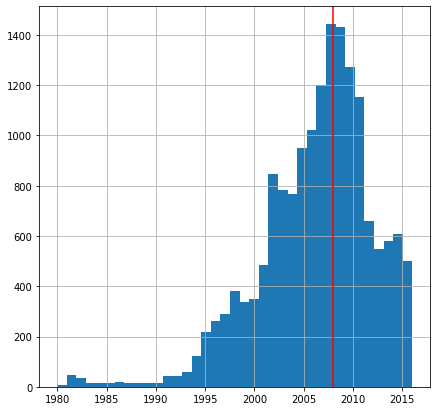

In [260]:
# Grafiquemos
df_clean.year.hist(bins = 37, figsize=(7,7))

plt.axvline(2008, color ="red")
plt.show()

Agregamos una línea vertical en 2008 para indicar la crisis financiera global: poco después de este año es cuando el número de títulos lanzados sufre una caída estrepitosa y casi al final del gráfico empieza a recuperarse (recuerdese que los datos del 2016 no están completos, por eso pareciera es una bajada continua). La industria de los videojuegos ha crecido de manera significativa, pero no esta exenta de los factores externos (si hay una crisis, la gente no podrá comprar tantos videojuegos y se tendrán menos lanzamientos). Al igual, por otro lado, estos no incluyen juegos de celular que es un mercado que esta en tremenda expansión por lo que no reflejan la totalidad de los videojuegos.

### Ventas por plataforma
<a class="anchor" id="2.2"></a>

Analizaremos como se comporta los lanzamientos de los videojuegos en el transcurso de la vida de la consola, pero como tenemos varias, analizaremos solo las mas exitosas. Mostremos un pivote de las ventas.

In [261]:
df_clean.pivot_table(index="platform", values="sales_total", aggfunc="sum").sort_values("sales_total", ascending=False)

,sales_total
platform,
PS2,1250.92
X360,966.67
PS3,935.18
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


Nos quedaremos hasta GBA debido a que el resto de consolas tiene pocas ventas o en el momento de recolección de datos (2016, 2017) todavía estaba en su ciclo de vida usual y los datos no son completos. Hagamos una tabla pivote con las ventas de estas plataformas por año y mostremos un heatmap con seaborne.

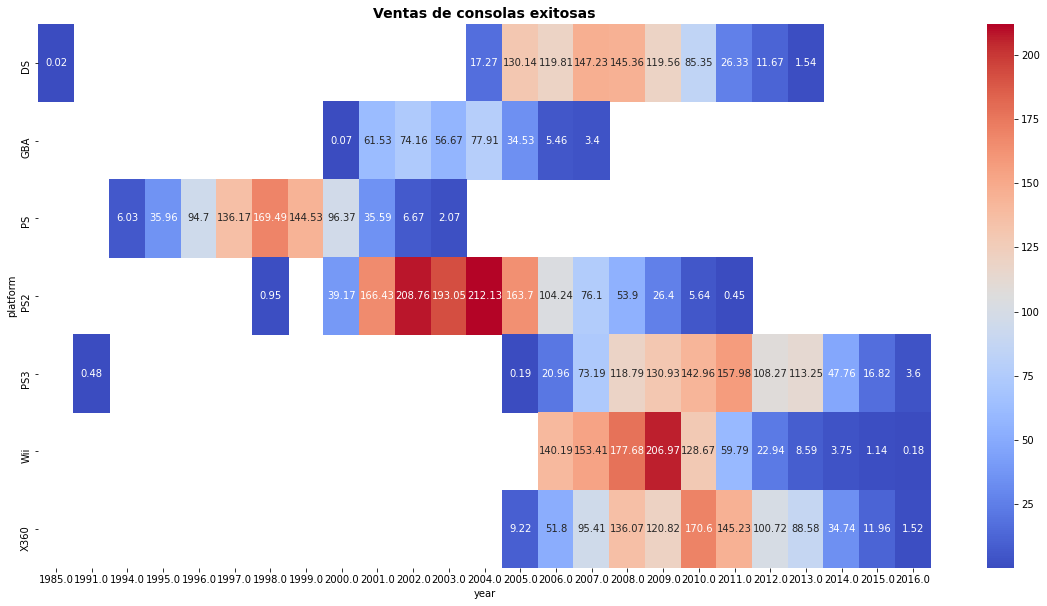

In [262]:
# Definamos consolas y hagamos el pivote
top_sales_platforms = ["PS2", "X360", "PS3", "Wii", "DS", "PS", "GBA"]

top_sales_consoles_pivot = df_clean.query("platform in @top_sales_platforms").pivot_table(
    index="platform", values="sales_total", aggfunc="sum", columns="year"
)

#top_sales_consoles_pivot.style.background_gradient(cmap ='Accent')
plt.figure(figsize=(20, 10))

# Mostremos un heatmap con seaborne
sns.heatmap(
    top_sales_consoles_pivot, cmap='coolwarm', annot=True, fmt='.5g'
)

plt.title("Ventas de consolas exitosas", fontsize=14.0, fontweight=800)
plt.show()

Interesante, podemos apreciar el claro comportamiento en que las consolas venden mucho hasta un pico y vuelven a descender. También nótese que hay tres combinaciones algo inusuales, DS-1985, PS2-1998, y PS3-1991. Estos valores deben ser incorrectos porque preceden al lanzamiento de estas consolas. Veamos que tenemos.

In [263]:
# Mostremos los valores que tenemos
display(
    df_clean.query("platform == 'DS'").sort_values("year").head(3)
)

display(
    df_clean.query("platform == 'PS2'").sort_values("year").head(3)
)

display(
    df_clean.query("platform == 'PS3'").sort_values("year").head(3)
)

,name,platform,year,genre,sales_na,sales_eu,sales_jp,sales_other,score_critic,score_user,rating,sales_total,sales_max_proportion,rating_recategorized
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.00,0.0,0.02,0.00,NaN,NaN,NaN,0.02,0.000671,unknown
14161,Puyo Pop Fever(us sales),DS,2004.0,Puzzle,0.03,0.0,0.00,0.00,NaN,NaN,NaN,0.03,0.001007,unknown
6578,Madden NFL 2005,DS,2004.0,Sports,0.24,0.0,0.00,0.02,68.0,7.7,E,0.26,0.008725,E


,name,platform,year,genre,sales_na,sales_eu,sales_jp,sales_other,score_critic,score_user,rating,sales_total,sales_max_proportion,rating_recategorized
2157,Wheel of Fortune,PS2,1998.0,Misc,0.47,0.36,0.00,0.12,NaN,NaN,E,0.95,0.045651,E
2446,Street Fighter EX3,PS2,2000.0,Fighting,0.32,0.25,0.20,0.08,64.0,7.9,T,0.85,0.040846,T
5329,EverGrace,PS2,2000.0,Role-Playing,0.10,0.08,0.15,0.03,59.0,7.8,T,0.36,0.017299,T


,name,platform,year,genre,sales_na,sales_eu,sales_jp,sales_other,score_critic,score_user,rating,sales_total,sales_max_proportion,rating_recategorized
4127,Sonic the Hedgehog,PS3,1991.0,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,0.48,0.022803,E
7584,WRC: FIA World Rally Championship,PS3,2005.0,Racing,0.00,0.14,0.01,0.04,68.0,4.5,NaN,0.19,0.009026,unknown
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,1.17,0.055582,E


Parece que tenemos datos mal catalogados: Strongest Tokyo University Shogi DS según lo poco que se observa de internet es un juego de los 80's, Wheel of Fortune es un nombre génerico por lo que tal vez sea un juego de otra plataforma(¿PS tal vez?), y Sonic the Hedgehog es un nombre repetido, así que debe haber un problema del año. Como las ventas son pequeñas, los removemos.

In [264]:
# Lo removemos
df_clean = df_clean.drop(15957)
df_clean = df_clean.drop(2157)
df_clean = df_clean.drop(4127)

Parece que es un problema debido a que hay un juego llamado igual para otro año. Lo removemos para evitar problemas.

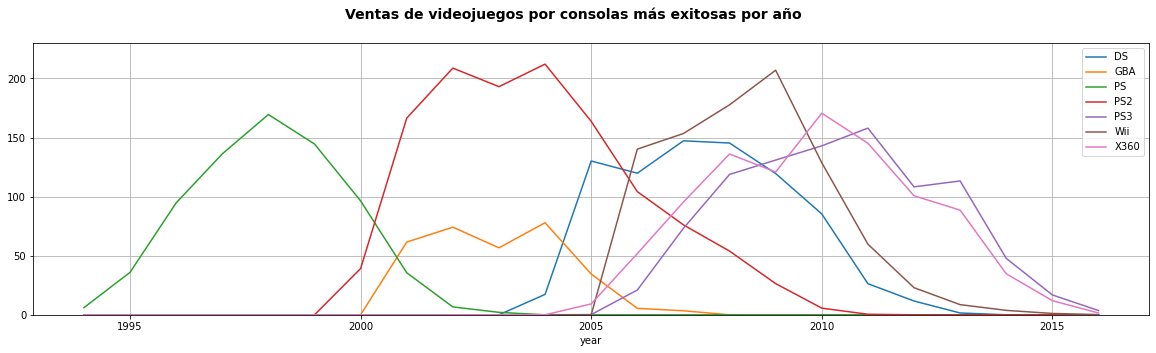

In [265]:
# Lo redeclaramos ya limpio
top_sales_consoles_pivot = df_clean.query("platform in @top_sales_platforms").pivot_table(
    index="platform", values="sales_total", aggfunc="sum", columns="year"
)

# Grafiquemos
for plat in top_sales_consoles_pivot.index:
    top_sales_consoles_pivot.loc[plat].plot(
        x = "year", y = "sales_total", figsize=(20,5), grid=True, legend=True, kind="line", stacked=True#, marker="o"
    )

plt.ylim(0,230)
plt.suptitle("Ventas de videojuegos por consolas más exitosas por año", fontsize=14.0, fontweight=800)
plt.show()

Interesante, podemos ver que las consolas tienen un apogeo de ventas y que caen conforme pasa el tiempo, parecieran distribuirse de manera normal. De la gráfica se ve que el tiempo usual de ventas es entre seis a ocho años hasta que ya disminuyen seriamente.

### Modelo de ventas: ventas del 2012 en adelante
<a class="anchor" id="2.3"></a>

Para crear un modelo de ventas que nos permita dislumbrar patrones en nuestros datos consideraremos el período del 2012 en adelante, las razones son principalmente tres:
1. Por esos años empiezan a cambiar las tendencias hacia juegos de acción/shooters con el modo online (que sigue siendo lo de hoy).
2. Justo después de la crisis económica (línea vertical que se muestra en el histograma de [Lanzamientos por año](#2.1)), existe una caída y luego una tendencia alcista: queremos ver ese comportamiento hacia arriba.
3. Finalmente, 5 años hacia atrás no es demasiado tiempo (tomar intervalos de 10, 15 años hacia atrás en un mercado tan cambiante daría patrones inusuales), y es similar al período de apogeo de ventas de las consolas como vimos antes (de 6 a 8 años).

Vamos a ello.

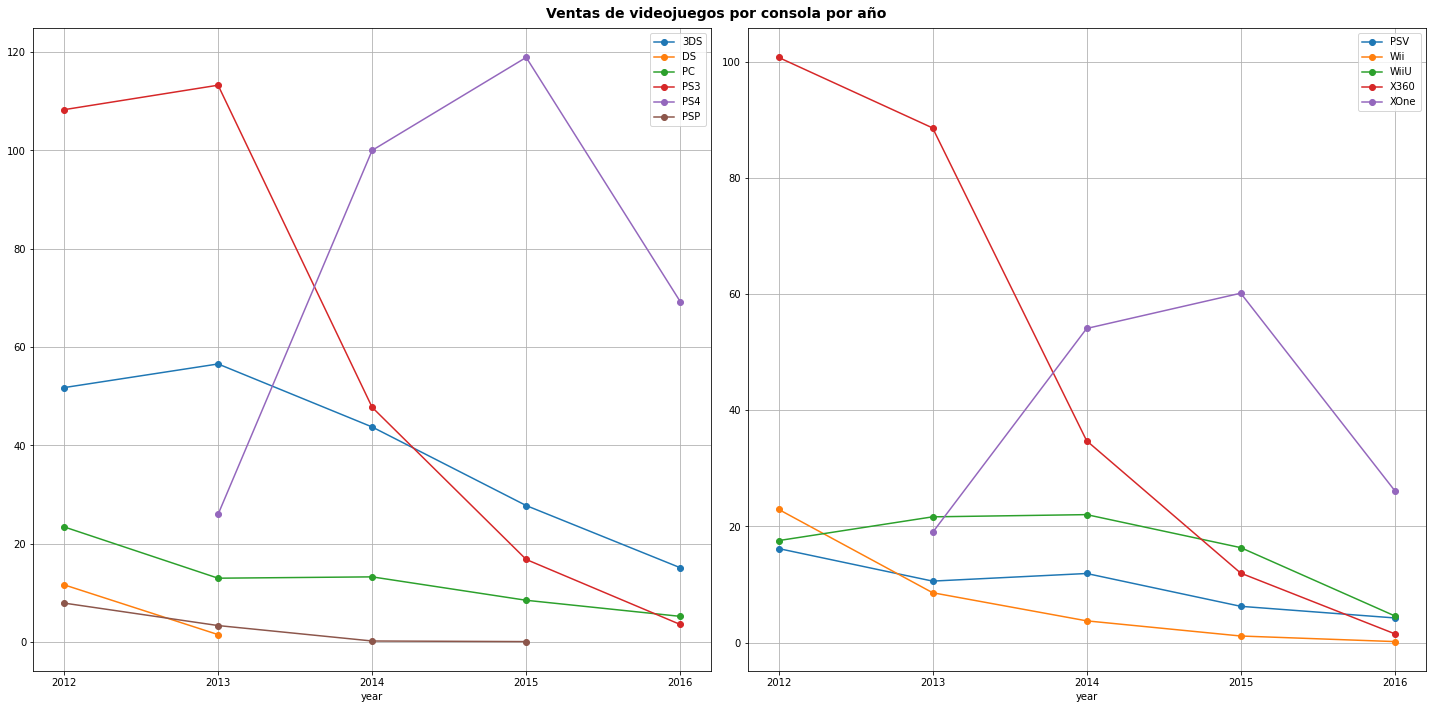

In [266]:
# Limitemos el rango
df_clean_year_range = df_clean.query("year >= 2012")

# Definamos el pivote
platform_year_sales_pivot_new_range = df_clean_year_range.pivot_table(
    index="platform", values="sales_total", aggfunc="sum", columns="year"
)

# Grafiquemos
fig, ax = plt.subplots(1, 2, figsize=(20,5))

for plat in platform_year_sales_pivot_new_range.index:
    
    # Decide que ax usar
    if plat in platform_year_sales_pivot_new_range.index[:6]:
        curr_ax = 0,
    else:
        curr_ax = 1
    
    platform_year_sales_pivot_new_range.loc[plat].plot(
        x = "year", y = "sales_total", figsize=(20,10), grid=True, legend=True, kind="line", marker='o', ax=ax[curr_ax]
    )

ax[0].set_xticks([2012, 2013, 2014, 2015, 2016])
ax[1].set_xticks([2012, 2013, 2014, 2015, 2016])

plt.suptitle("Ventas de videojuegos por consola por año", fontsize=14.0, fontweight=800)

plt.tight_layout()
plt.show()


Podemos apreciar que para este periodo tenemos más de diez plataformas diferentes, pero solo tres son bastante exitosas recientemente: 3DS, Xbox One y PS4. Hay que notar que probablemente los datos de 2016 esten incompletos y por ese se ve esa caída al final de las gráficas. El resto de consolas va en descenso pronunciado, o en el caso de PC, simplemente no logra levantar demasiado.

Si hubiera que elegir una sola consola esta sería sin duda el PS4 porque ha movido más títulos en total que las demás para este periodo.

Ahora, por otro lado, podemos mostrar las ventas para este periodo por consola como una diagrama de caja y apreciar las tendencias agregadas.

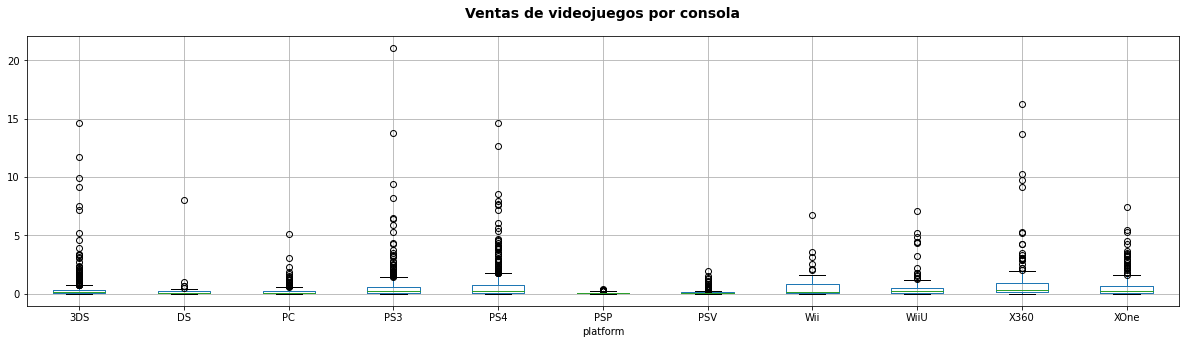

In [267]:
_, ax = plt.subplots(1,1, figsize=(20,5))


df_clean_year_range.boxplot(column = "sales_total", by="platform", ax=ax)
#ax.set_yticks([0,1,2,3,4,5])

plt.suptitle("Ventas de videojuegos por consola", fontsize=14.0, fontweight=800)
plt.title("")
plt.show()

Esto es muy interesante, parece que la mediana de ventas de los videojuegos es muy similar en todas las consolas, pero lo que realmente empuja los valores en la gráfica anterior son los outliers. Mostremos de nuevo esta gráfica, pero con límites más apretados para el eje y.

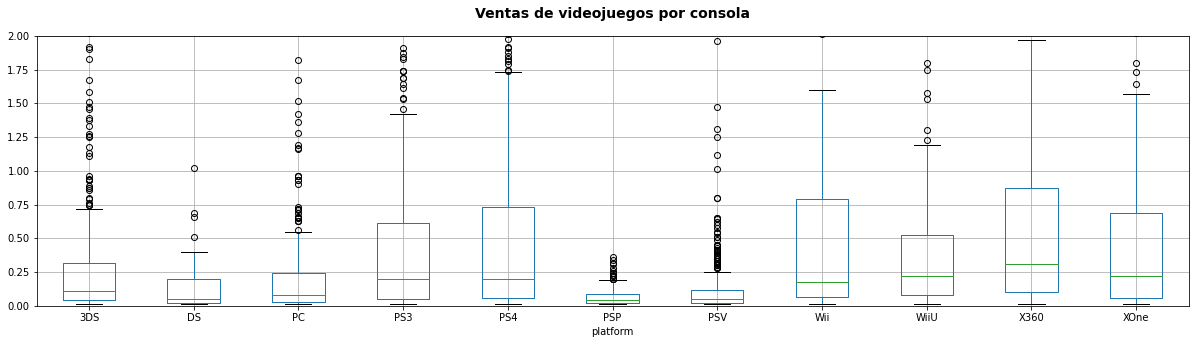

In [268]:
_, ax = plt.subplots(1,1, figsize=(20,5))


df_clean_year_range.boxplot(column = "sales_total", by="platform", ax=ax)#, showfliers=False)
ax.set_ylim(0,2)

plt.suptitle("Ventas de videojuegos por consola", fontsize=14.0, fontweight=800)
plt.title("")
plt.show()

Que cosa tan interesante: **en la mayoría de los casos los títulos jamás pasan de de vender el millón de dólares totales.** Si esto lo pensamos un poco es claro que la mayoría de los lanzamientos son un fracaso en ventas, porque los costos de hacer un videojuego son altísimos. Eso debe explicar porque es común que muchos estudios cierren a los pocos años de abrir.

Hay que hacer hincapié en esto, pues aunque uno podría enfocarse en un puñado de plataformas, lo que realmente debe generar ingreso es vender variedad porque es aquí donde uno encuentra esos outliers que generan mucho ingreso.

### Relación ventas-reseñas
<a class="anchor" id="2.4"></a>

Para poder observar como es el comportamiento de las ventas debido a las reseñas, eligiremos dos consolas que empezaron a vender unidades en el 2013: PS4 y Xbox One. También, filtraremos fuera aquellos valores que son nulos en alguno de los _scores_ para que solo tengamos valores completos.

Hagamos una gráfica de dispersión para los dos tipos de reseña y las ventas totales.


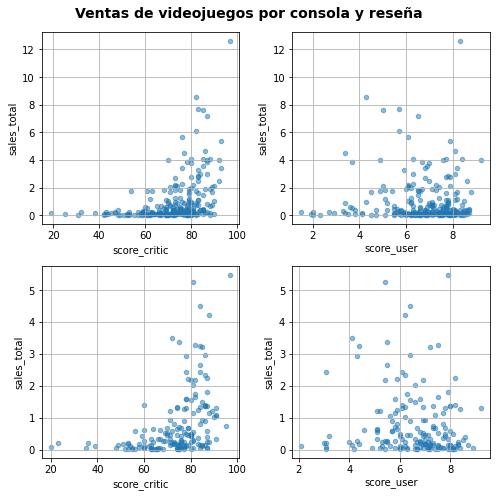

In [269]:
# Tomemos solo valores no nulos de score
df_clean_score_not_null = df_clean_year_range[
    ~df_clean_year_range.score_user.isnull() & ~df_clean_year_range.score_critic.isnull()
]

# Grafiquemos
fig, ax = plt.subplots(2, 2, figsize=(7,7))

# Grafiquemos para PS4
df_clean_score_not_null.query("platform == 'PS4'").plot(
    x = "score_critic", y = "sales_total", kind="scatter", grid=True, ax=ax.flat[0], alpha=0.5
)

df_clean_score_not_null.query("platform == 'PS4'").plot(
    x = "score_user", y = "sales_total", kind="scatter", grid=True, ax=ax.flat[1], alpha=0.5
)

# Grafiquemos para XBOX ONE
df_clean_score_not_null.query("platform == 'XOne'").plot(
    x = "score_critic", y = "sales_total", kind="scatter", grid=True, ax=ax.flat[2], alpha=0.5
)

df_clean_score_not_null.query("platform == 'XOne'").plot(
    x = "score_user", y = "sales_total", kind="scatter", grid=True, ax=ax.flat[3], alpha=0.5
)

#ax[0].set_xticks([2012, 2013, 2014, 2015, 2016])
#ax[1].set_xticks([2012, 2013, 2014, 2015, 2016])

plt.suptitle("Ventas de videojuegos por consola y reseña", fontsize=14.0, fontweight=800)

plt.tight_layout()
plt.show()

Aquí podemos notar algo que habíamos observado anteriormente: los juegos con mayor número de ventas totales suelen tener una buena reseña de los críticos, más lo contrario no es cierto, tener una buena reseña no es garantía de ventas. Para el caso de ventas-reseña de usuarios, la relación no es tan clara, los datos están un poco más dispersos. Una buena manera de vender más unidades sería tener más _stock_ de aquellos con buen rating de críticos profesionales.

### Ventas del mismo título en distintas plataformas
<a class="anchor" id="2.5"></a>

Veamos que sucede con las ventas de los juegos que se hallan tanto en PS4 como en Xbox One, para ver si existen diferencias en el número total.

In [270]:
# Mostremos solo juegos en las consolas requeridas.
df_clean_PS4_XOne = df_clean_year_range.query("platform == 'PS4' | platform == 'XOne'")

# Solo duplicados
df_clean_duplicated = df_clean_PS4_XOne[df_clean_PS4_XOne.duplicated("name", keep=False)]

# Mostremos
df_clean_duplicated.sort_values("name")

,name,platform,year,genre,sales_na,sales_eu,sales_jp,sales_other,score_critic,score_user,rating,sales_total,sales_max_proportion,rating_recategorized
9197,7 Days to Die,PS4,2016.0,Action,0.04,0.08,0.00,0.02,45.0,5.9,M,0.14,0.009569,M
12863,7 Days to Die,XOne,2016.0,Action,0.03,0.02,0.00,0.00,35.0,5.2,M,0.05,0.006766,M
12920,Adventure Time: Finn & Jake Investigations,XOne,2015.0,Action,0.03,0.02,0.00,0.00,NaN,NaN,NaN,0.05,0.006766,unknown
10893,Adventure Time: Finn & Jake Investigations,PS4,2015.0,Action,0.03,0.05,0.00,0.02,NaN,NaN,NaN,0.10,0.006835,unknown
14940,Agatha Christie's The ABC Murders,PS4,2016.0,Adventure,0.01,0.01,0.00,0.00,67.0,6.2,T,0.02,0.001367,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9117,XCOM 2,PS4,2016.0,Strategy,0.04,0.08,0.00,0.02,88.0,8.0,T,0.14,0.009569,T
16645,ZombiU,XOne,2016.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,0.001353,unknown
12761,ZombiU,PS4,2016.0,Action,0.00,0.04,0.01,0.01,NaN,NaN,NaN,0.06,0.004101,unknown
7539,Zombie Army Trilogy,PS4,2015.0,Shooter,0.05,0.12,0.00,0.03,62.0,6.8,NaN,0.20,0.013671,unknown


Tenemos demasiados datos para ver así, por lo que haremos un pivote con las ventas.

In [271]:
# Hagamos el pivote
df_duplicated_pivot_sales = df_clean_duplicated.pivot_table(index="name", values="sales_total", columns="platform")
df_duplicated_pivot_sales["resta"] = df_duplicated_pivot_sales.PS4 - df_duplicated_pivot_sales.XOne

df_duplicated_pivot_sales

platform,PS4,XOne,resta
name,,,
7 Days to Die,0.14,0.05,0.09
Adventure Time: Finn & Jake Investigations,0.10,0.05,0.05
Agatha Christie's The ABC Murders,0.02,0.01,0.01
Alien: Isolation,1.12,0.50,0.62
Angry Birds Star Wars,0.22,0.17,0.05
...,...,...,...
Wolfenstein: The Old Blood,0.43,0.15,0.28
Worms: WMD,0.03,0.01,0.02
XCOM 2,0.14,0.04,0.10


Nada más viendo por encima, parece que la versión de PS4 suele vender más, pero calculemos el promedio y mediana de la diferencia entre ambas.

In [272]:
print(f"La media es {df_duplicated_pivot_sales.resta.mean()} y la mediana es {df_duplicated_pivot_sales.resta.median()}.")

La media es 0.5852073732718894 y la mediana es 0.21000000000000002.


En promedio cada título vende algo así como 580 mil dólares más en PS4 y 210 mil dólares más en mediana.

### Ventas por género
<a class="anchor" id="2.6"></a>

Mostremos como se distribuyen los lanzamientos y ventas de cada género para este periodo seleccionado.

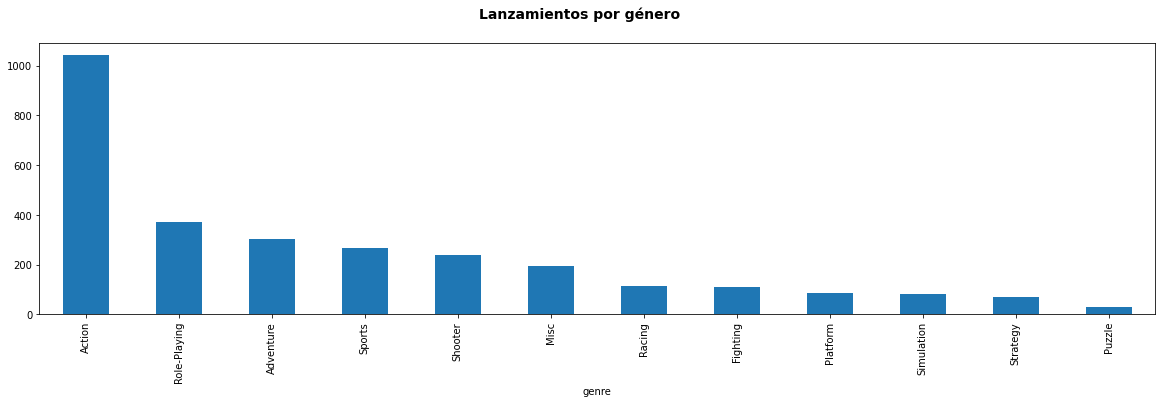

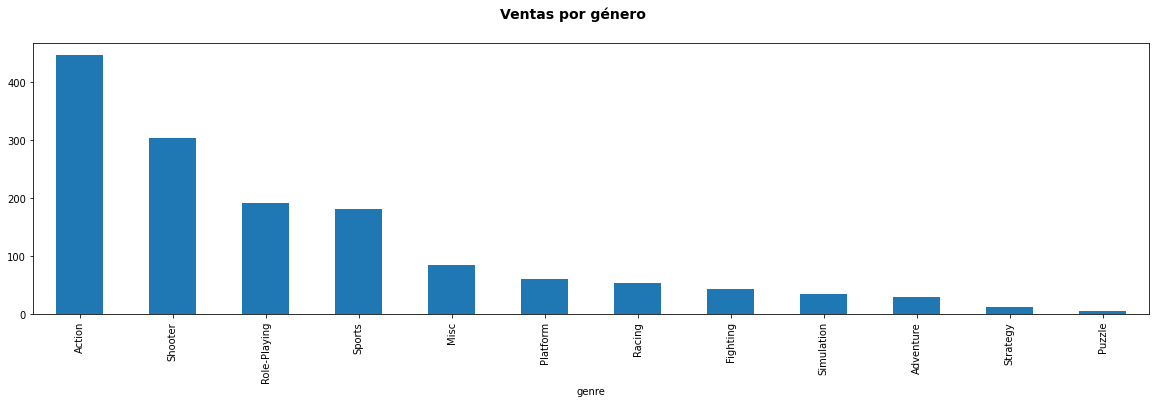

In [273]:
df_clean_year_range.groupby(by="genre")["sales_total"].count().sort_values(ascending=False).plot(kind="bar", figsize=(20, 5))

plt.suptitle("Lanzamientos por género", fontsize=14.0, fontweight=800)
plt.show()

df_clean_year_range.groupby(by="genre")["sales_total"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(20, 5))

plt.suptitle("Ventas por género", fontsize=14.0, fontweight=800)
plt.show()

Es claro que acción es el género más vendido y con más lanzamientos, pero si queremos ingresar más dinero por unidad podríamos decir que los shooters son en general mejores: hay menos títulos, pero las ventas son más altas en proporción. Calculemos esa proporción ventas/títulos:

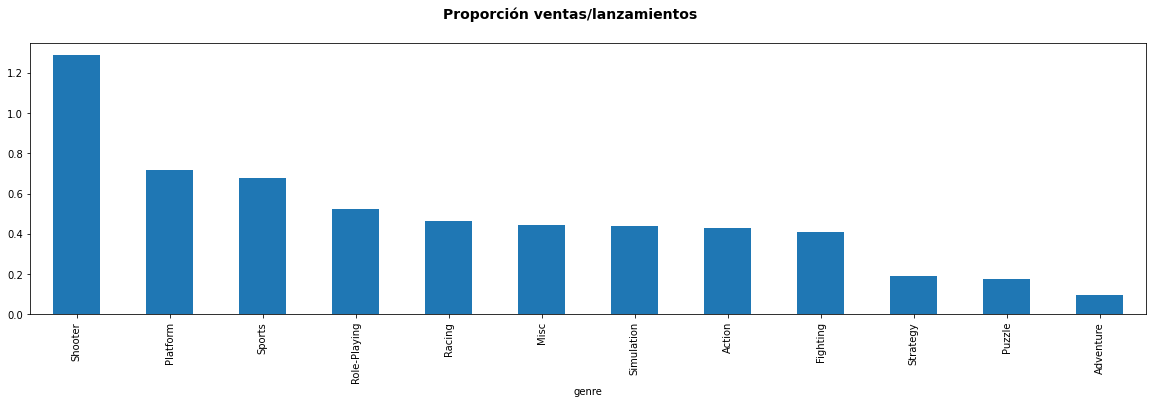

In [274]:
df_relation_count_sum = (
    df_clean_year_range.groupby(by="genre")["sales_total"].mean() #/ 
    #df_clean_year_range.groupby(by="genre")["sales_total"].count()
)

df_relation_count_sum.sort_values(ascending=False).plot(kind="bar", figsize=(20, 5))

plt.suptitle("Proporción ventas/lanzamientos", fontsize=14.0, fontweight=800)
plt.show()

Que resultado, parece que en promedio los juegos de acción no son tan rentables como pensabamos(muy probablemente los outliers si sean una buena apuesta, títulos AAA). Shooters, plataformas, deportes, juegos de rol, carreras y simulación parecen ser mejores.

## Perfil de usuario por región
<a class="anchor" id="3"></a>

### Cuota de mercado de consola
<a class="anchor" id="3.1"></a>

Hasta el momento, hemos estado trabajando con las ventas totales de nuestros títulos, pero también podríamos echar mano de la información que tenemos para diversas regiones. Analicemos como se comportan las ventas por plataforma por región.

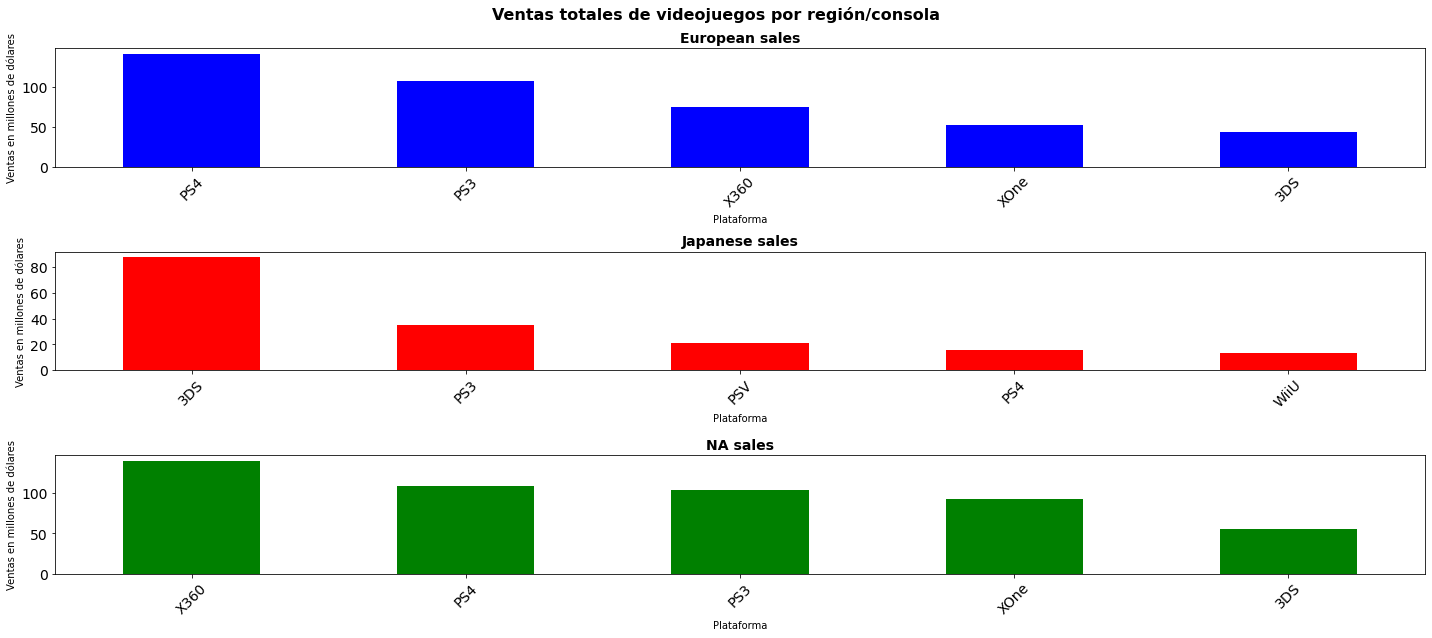

In [275]:
# Creamos el pivote de región-plataforma
sales_region_platform_pivot = df_clean_year_range.pivot_table(
    index="platform", values = ["sales_na", "sales_jp", "sales_eu"], aggfunc="sum"
)

fig, ax = plt.subplots(3, 1, figsize=(20,9))

# EU sales
sales_region_platform_pivot.sort_values("sales_eu", ascending=False)[:5]["sales_eu"].plot(
    kind="bar", ax=ax[0], rot=45, color="b", fontsize=14,
)
ax[0].set_title("European sales", fontsize=14.0, fontweight=800)

# JP sales
sales_region_platform_pivot.sort_values("sales_jp", ascending=False)[:5]["sales_jp"].plot(
    kind="bar", ax=ax[1], rot=45, color="r", fontsize=14,
)
ax[1].set_title("Japanese sales", fontsize=14.0, fontweight=800)

# NA sales
sales_region_platform_pivot.sort_values("sales_na", ascending=False)[:5]["sales_na"].plot(
    kind="bar", ax=ax[2], rot=45, color="g", fontsize=14,
)
ax[2].set_title("NA sales", fontsize=14.0, fontweight=800)

ax[0].set_xlabel("Plataforma")
ax[0].set_ylabel("Ventas en millones de dólares")

ax[1].set_xlabel("Plataforma")
ax[1].set_ylabel("Ventas en millones de dólares")

ax[2].set_xlabel("Plataforma")
ax[2].set_ylabel("Ventas en millones de dólares")

plt.suptitle("Ventas totales de videojuegos por región/consola", fontsize=16.0, fontweight=800)
plt.tight_layout()
plt.show()

Se ve claro que el comportamiento es distinto para cada región: en Europa domina PS4, PS3 y X360 mientrás que el Nintendo 3DS esta en un quinto lugar con alrededor de ~50 millones de títulos vendidos; en Norteamérica dominan las mismas pero el Xbox 360 es el claro ganador; en Japón la 3DS es la que arrasa y el WiiU aparece, al igual que el PS Vita (ambos con pocas ventas), mientrás que las consolas de Microsoft no pintan.

Es claro que fuera de Japón las consolas de Sony pelean más de cerca con las de Microsoft, con nichos de mercado distintos para las consolas de Nintendo. De antemano se ha tenido la noción que las consolas de Nintendo tienen videojuegos para públicos distintos, pero no tenemos datos duros para aseverarlo, en el siguiente paso podremos tener más elementos para eso.

### Géneros principales por región
<a class="anchor" id="3.2"></a>

Hagamos algo similar al apartado anterior, pero enfocándonos solo con los géneros de los títulos en venta.

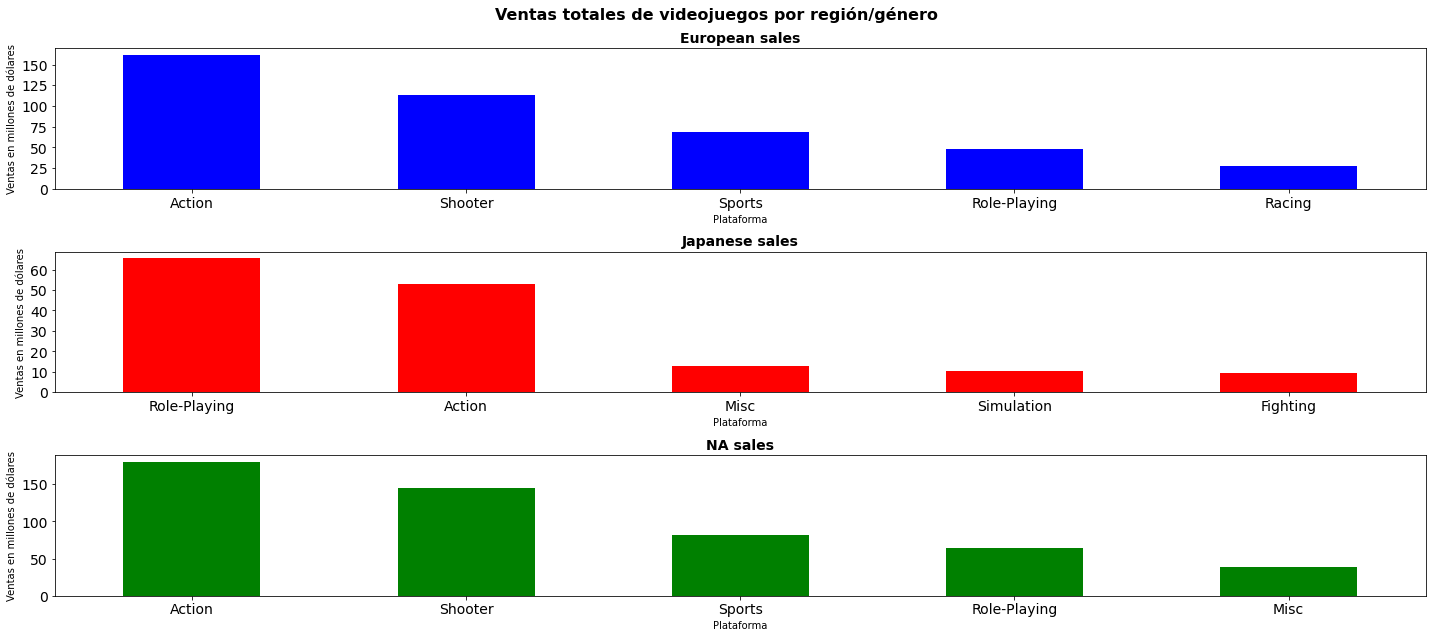

In [276]:
# Creamos el pivote de región-género
sales_region_genre_pivot = df_clean_year_range.pivot_table(
    index="genre",
    values = ["sales_na", "sales_jp", "sales_eu"],
    aggfunc= "sum"
)

fig, ax = plt.subplots(3, 1, figsize=(20,9))

# EU sales
sales_region_genre_pivot.sort_values("sales_eu", ascending=False)[:5]["sales_eu"].plot(
    kind="bar", ax=ax[0], rot=0, color="b",  fontsize=14,
)
ax[0].set_title("European sales", fontsize=14.0, fontweight=800)

# JP sales
sales_region_genre_pivot.sort_values("sales_jp", ascending=False)[:5]["sales_jp"].plot(
    kind="bar", ax=ax[1], rot=0, color="r",  fontsize=14
)
ax[1].set_title("Japanese sales", fontsize=14.0, fontweight=800)

# NA sales
sales_region_genre_pivot.sort_values("sales_na", ascending=False)[:5]["sales_na"].plot(
    kind="bar", ax=ax[2], rot=0, color="g",  fontsize=14,
)
ax[2].set_title("NA sales", fontsize=14.0, fontweight=800)


ax[0].set_xlabel("Plataforma")
ax[0].set_ylabel("Ventas en millones de dólares")

ax[1].set_xlabel("Plataforma")
ax[1].set_ylabel("Ventas en millones de dólares")

ax[2].set_xlabel("Plataforma")
ax[2].set_ylabel("Ventas en millones de dólares")

plt.suptitle("Ventas totales de videojuegos por región/género", fontsize=16.0, fontweight=800)

plt.tight_layout()
plt.show()

Aquí se aprecia otra vez la diferencia clara con el mercado japonés: mientrás que los títulos de deportes, acción y disparos reinan en Europa y NA, en Japón los juegos de rol y de acción son top; incluso aparecen de simulación y peleas. En Japón que los juegos de rol son los más vendidos, se ven más representados en la Nintendo 3DS y es por eso que es tan popular ahí: lo inverso es cierto en las otras regiones, donde acción y shooters son géneros de juegos más comunes en Xbox, Playstation.

### Clasificaciones ESRB por región
<a class="anchor" id="3.3"></a>

_Nota: ESRB es un grupo sin fines de lucro que opera en Estados Unidos, el equivalente en Japón es CERO y en Europa es PEGI. Esto altera los datos originales si un título no se publicó fuera de Estados Unidos: no tendrá rating._


Haremos un procedimiento similar a lo realizado para la sección anterior, pero enfocado con el rating. Filtraremos los _unknowns_ fuera, pues no son de nuestro interés.

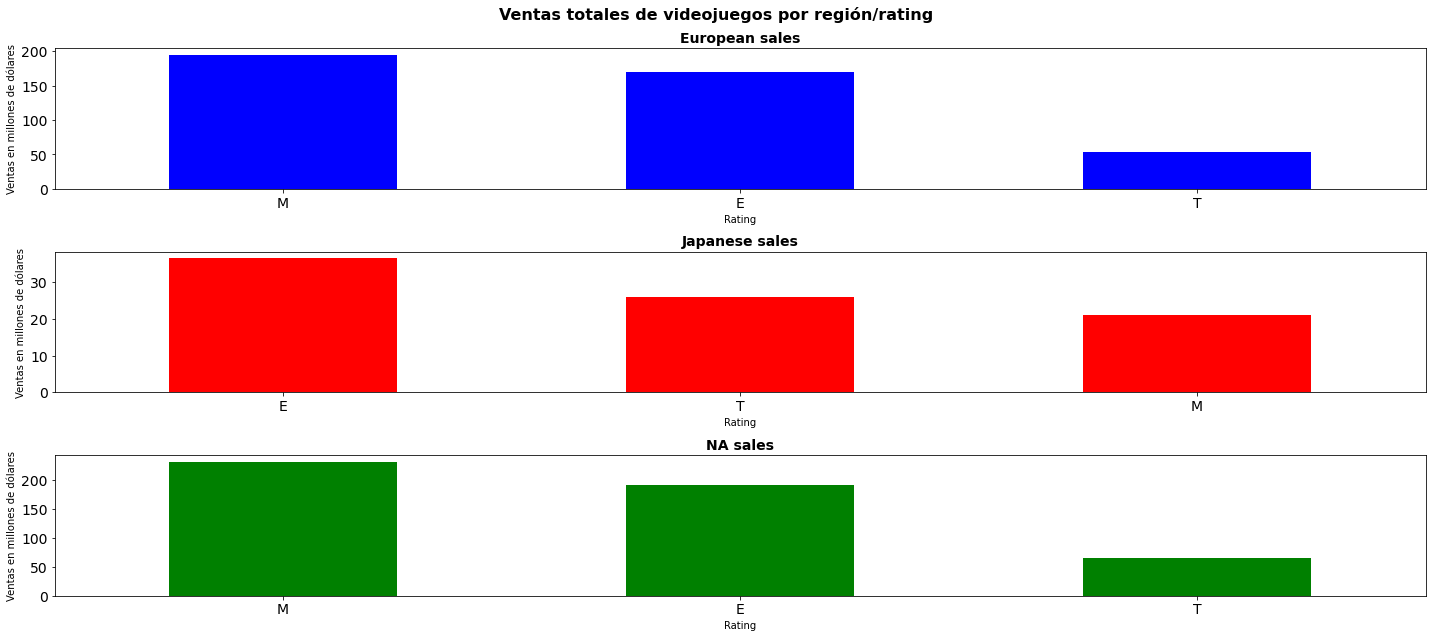

In [277]:
# Creamos el pivote de región-rating
sales_region_rating_pivot = df_clean_year_range.query("rating_recategorized != 'unknown'").pivot_table(
    index="rating_recategorized",
    values = ["sales_na", "sales_jp", "sales_eu"],
    aggfunc= "sum"
)

fig, ax = plt.subplots(3, 1, figsize=(20,9))

# EU sales
sales_region_rating_pivot["sales_eu"].sort_values(ascending=False).plot(
    kind="bar", ax=ax[0], rot=0, color="b",  fontsize=14
)

ax[0].set_title("European sales", fontsize=14.0, fontweight=800)

# Japanese sales
sales_region_rating_pivot["sales_jp"].sort_values(ascending=False).plot(
    kind="bar", ax=ax[1], rot=0, color="r",  fontsize=14
)

ax[1].set_title("Japanese sales", fontsize=14.0, fontweight=800)

# NA sales
sales_region_rating_pivot["sales_na"].sort_values(ascending=False).plot(
    kind="bar", ax=ax[2], rot=0, color="g",  fontsize=14
)

ax[2].set_title("NA sales", fontsize=14.0, fontweight=800)


ax[0].set_xlabel("Rating")
ax[0].set_ylabel("Ventas en millones de dólares")

ax[1].set_xlabel("Rating")
ax[1].set_ylabel("Ventas en millones de dólares")

ax[2].set_xlabel("Rating")
ax[2].set_ylabel("Ventas en millones de dólares")

plt.suptitle("Ventas totales de videojuegos por región/rating", fontsize=16.0, fontweight=800)

plt.tight_layout()
plt.show()

Se observa otra vez que en Japón las ventas siguen un comportamiento diferente al del resto: mientrás que M y E son los más comunes fuera, en Japón es T y E; esto debe ser porque los juegos de rol deben tener otro comportamiento ( y son los más populares en Japón). Nada más para terminar, veamos una tabla pivote de los géneros y el rating ESRB moda.

In [278]:
df_clean_year_range.query("rating_recategorized != 'unknown'").pivot_table(
    index = "genre", values="rating_recategorized", aggfunc=lambda x: x.mode().iat[0]
)

,rating_recategorized
genre,
Action,M
Adventure,M
Fighting,T
Misc,E
Platform,E
Puzzle,E
Racing,E
Role-Playing,T
Shooter,M


Aquí se aprecia bien que es por eso que el rating de más ventas en Japón es T.

### Pruebas de hipótesis
<a class="anchor" id="3.4"></a>

Ya que hemos llegado a este punto, comprobaremos dos hipótesis que tenemos acerca de las calificaciones promedio de los usuarios:

1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Usaremos métodos estadísticos para esto

#### Promedio de Xbox One y PC
<a class="anchor" id="3.4.1"></a>

Definamos la hipótesis nula de que los promedios son iguales para ambas, $H_0: \mu_{Xbox} = \mu_{PC}$; la hipótesis alternativa es $H_1 : \mu_{Xbox} \neq \mu_{PC}$. Establezcamos una tolerancia $\alpha = 0.05$, para un intervalo de confianza de 95%.

Mostremos un boxplot de los dos valores que deseamos probar con nuestra hipótesis antes de hacer la prueba propiamente.

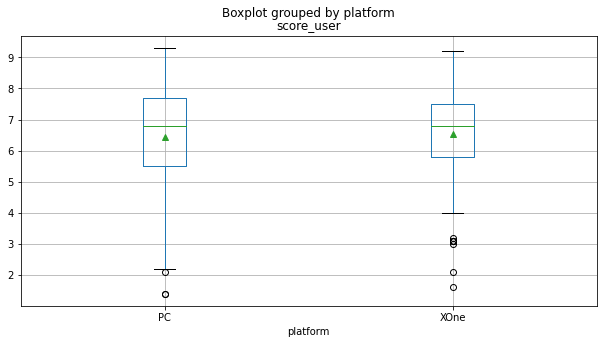

In [279]:
# Mostremos el boxplot

df_score_not_null = df_clean_year_range[~df_clean_year_range.score_user.isnull()]

df_score_not_null.query("platform == 'XOne' or platform == 'PC'").boxplot(
    column="score_user", by="platform", figsize=(10,5), showmeans=True
)

plt.show()

Se nota que la distribución es muy similar entre ambas, e incluso la media es similar. Antes de hacer la prueba de hipótesis, realicemos una prueba de Levene para saber si las varianzas son similares.

In [280]:
# Establecemos alpha
alpha = 0.05

result = st.levene(
    df_score_not_null.query("platform == 'XOne'").score_user,
    df_score_not_null.query("platform == 'PC'").score_user,
    center="mean"
)

# Prueba de Levene
print('p-valor:', result.pvalue)

if result.pvalue < alpha:
    print("Las varianzas no son similares.")
else:
    print("Las varianzas son apróximadamente similares.")

p-valor: 0.004697715245950616
Las varianzas no son similares.


La prueba de Levene indica varianzas distintas, hagamos la prueba de hipótesis.

In [281]:
# Prueba para las plataformas
stat_result_hyp1 = st.ttest_ind(
    df_score_not_null.query("platform == 'XOne'").score_user,
    df_score_not_null.query("platform == 'PC'").score_user,
    equal_var=False
)
alpha = 0.05

print("El valor p es", stat_result_hyp1.pvalue)

if stat_result_hyp1.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")


El valor p es 0.6206366351489678
No rechazamos la hipótesis nula


No podemos asegurar que son diferentes, lo más probable es que sean iguales tal como se aprecia en la gráfica de boxplots.

#### Promedio de Acción y Deportes
<a class="anchor" id="3.4.2"></a>

Definamos la hipótesis nula de que los promedios son iguales para ambas, $H_0: \mu_{Acción} = \mu_{Deportes}$; la hipótesis alternativa es $H_1 : \mu_{Acción} \neq \mu_{Deportes}$. Establezcamos una tolerancia $\alpha = 0.05$, para un intervalo de confianza de 95%.

Sigamos el mismo camino de la sección anterior, empecemos con la gráfica.

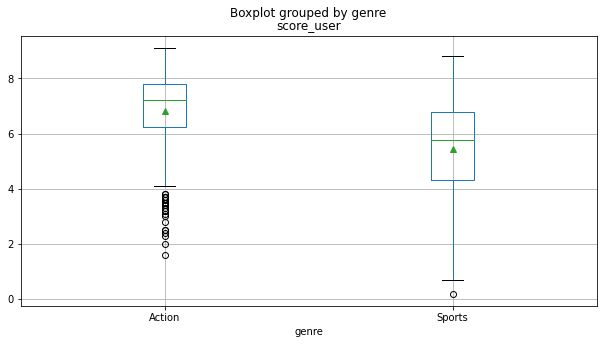

In [282]:
# Mostremos el boxplot
df_score_not_null.query("genre == 'Action' or genre == 'Sports'").boxplot(
    column="score_user", by="genre", figsize=(10,5), showmeans=True
)

plt.show()

Aquí se aprecia claramente que muy probablemente las medias sean distintas, realicemos la prueba de Levene ahora.

In [283]:
# Establecemos alpha
alpha = 0.05

result = st.levene(
    df_score_not_null.query("genre == 'Action'").score_user,
    df_score_not_null.query("genre == 'Sports'").score_user,
    center="mean"
)

# Prueba de Levesne
print('p-valor:', result.pvalue)

if result.pvalue < alpha:
    print("Las varianzas no son similares.")
else:
    print("Las varianzas son apróximadamente similares.")

p-valor: 2.5985840380968674e-06
Las varianzas no son similares.


La prueba de Levene es clara con varianzas distintas. Vamos a la prueba de hipótesis.

In [284]:
# Prueba para los géneros
stat_result_hyp2 = st.ttest_ind(
    df_score_not_null.query("genre == 'Action'").score_user,
    df_score_not_null.query("genre == 'Sports'").score_user,
    equal_var=False
)
alpha = 0.05

print("El valor p es", stat_result_hyp2.pvalue)

if stat_result_hyp2.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")


El valor p es 3.3183730691020334e-20
Rechazamos la hipótesis nula


Tal como imaginábamos de la gráfica, rechazamos la hipótesis nula: las medias deben de ser diferentes.

## Conclusiones
<a class="anchor" id="4"></a>

Hemos hecho un trabajo extenso con los datos que tenemos para videojuegos: limpieza general, cambiar columnas, remover duplicados y nulos,  y enriquecer los datos. El proceso ha sido amplio, y hemos optado por no imputar para tener datos fidedignos.

Notamos que hay tendencias de ventas de videojuegos a la alza (a excepción de una caída después de la crisis del 2008) y que en la mayoría de los casos los usuarios prefieren juegos de acción y disparos (Japón un poco distinto), al igual, las reseñas y las ventas totales no están completamente correlacionadas: es necesario una buena reseña para vender mucho, pero una buena reseña no garantiza el éxito comercial.

Las ventas para las regiones de Japón, Norteamérica y Europa son ligeramente distintas: los usarios japoneses prefieren los juegos de rol y los demás acción. Esto se relaciona con el hecho de que las plataformas más vendidas sean diferentes: 3DS en Japón que tiene más juegos de ese tipo, Playstation y Xbox en el resto (que tiene más juegos de acción/disparos).

Finalmente, probamos dos hipótesis: no rechazamos que las medias de reseñas de usuario para Xbox One y PC sean iguales, pero rechazamos que para Acción y deportes lo sean.